In [1]:
import os
from core.project import Project
from utils.config import DEFAULT_LITHO_LEXICON, DEFAULT_LITHO_LEGEND, DEFAULT_BOREHOLE_LEGEND

In [2]:
update_db = True
db_name = './new_db.db'
db_bkp = db_name.replace('.db', '')+'_bkp.db'
if os.path.exists(db_name) and not update_db:
    if os.path.exists(db_bkp):
        os.remove(db_bkp)
    os.rename(db_name, db_bkp)

## Create a new project from an empty database

In [3]:
p = Project.load(db_name)

/home/su530201/PycharmProjects/GSDMA/core/project.py:110: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   To silence this warning, add the parameter 'overlaps="components"' to the 'ComponentOrm.intervals' relationship. (Background on this error at: https://sqlalche.me/e/14/qzyx)
  self.boreholes_orm = {i.id: i for i in self.session.query(BoreholeOrm).all()}
/home/su530201/PycharmProjects/GSDMA/core/project.py:110: SAWarning: relationship 'Component

In [4]:
from core.orm import BoreholeOrm, IntervalOrm, PositionOrm, ComponentOrm, LinkIntervalComponentOrm

In [5]:
bh_id = 'F204' 
x = 152570.
y = 122536.
z = 100.

In [6]:
p.insert_borehole({'id':bh_id, 'borehole_type': 'piezometer', 'length': 15, 'diameter':.1, 'top':{'middle': z, 'x': x, 'y': y}, 'base':{'middle': 90., 'x': x, 'y': y}})

Boreholes in the project :  2


In [7]:
intv_dict={'description': 'sable grossier à la base et plus fin vers le haut',
           'interval_number': 1,
           'top':{'middle': 100., 'x': x, 'y': y},
           'base':{'middle': 94., 'x': x, 'y': y},
           'components':["{'lithology': 'limon'}", "{'benzene_industrial': 'VS'}"],
           'extra_data': 'None'
          }

In [8]:
p.insert_interval_in_borehole(bh_id, intv_dict)

Boreholes in the project :  3


In [9]:
intv_dict={'description': 'sable fin à la base et plus argileux vers le haut',
           'interval_number': 2,
           'top':{'middle': 93., 'x': x, 'y': y},
           'base':{'middle': 91., 'x': x, 'y': y},
           'components':["{'lithology': 'argile'}", "{'benzene_industrial': 'VI'}"],
           'extra_data': 'None'
          }

In [10]:
p.insert_interval_in_borehole(bh_id, intv_dict)

Boreholes in the project :  3


In [11]:
p.refresh(update_3d=True)

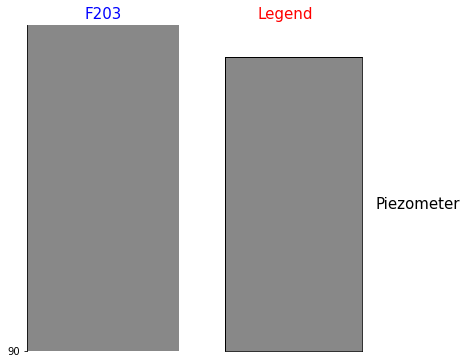

In [12]:
p.boreholes_3d[0].plot_log(repr_attribute=p.repr_attribute)

In [13]:
p.repr_attribute='lithology'

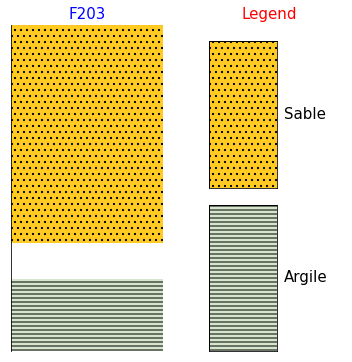

In [14]:
p.boreholes_3d[0].plot_log(repr_attribute=p.repr_attribute)

In [15]:
p.plot3d(window_size=(800, 600), repr_attribute='lithology', str_annotations=True, verbose=True)

/home/su530201/.local/share/virtualenvs/GSDMA-tJb-HgI6/lib/python3.8/site-packages/pyvista/core/dataset.py:1332: PyvistaDeprecationWarning: Use of `cell_arrays` is deprecated. Use `cell_data` instead.
  warnings.warn(


Borehole "F203" | attribute values -> ['sable', 'argile']
Borehole "F201" | attribute values -> ['sable', 'argile']
Borehole "F204" | attribute values -> ['limon', 'argile']


In [16]:
p.plot3d(window_size=(800, 600), repr_attribute='borehole_type', str_annotations=False, verbose=True)

Borehole "F203" | attribute values -> ['piezometer']
Borehole "F201" | attribute values -> ['piezometer']
Borehole "F204" | attribute values -> ['piezometer']


# Tests